In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Note: GaussianBlur and Laplacian
Test, manage noise by doing GaussianBlur, then make the image clearer with Laplacian_kernel.
     -Test 1, the result is not as good as it should, the output is black.
     -Test for the 2nd time, the output is too bright.

In [5]:
# ori_img = cv.imread('medicine_with_noise_mid.jpg')
# # fig = plt.figure(figsize=(20, 20))

# # print("Print Shape image:",original_img.shape) # Print shape image
# # print("Print dimentaional:",original_img.ndim) # Print dimentaional

# blur = cv.GaussianBlur(ori_img, (25, 25), 0)

# laplacian_kernel = np.array([[1, 0, 1],
#                               [-1, 4, -1],
#                               [1, 0, 1]])
                            
# laplacian_img=cv.filter2D(blur,-1,laplacian_kernel)
# shapen=blur+((-1*laplacian_img).astype(int))


# output=np.hstack((ori_img, blur,shapen))
# fig=plt.figure(figsize=(50, 50))

# # plt.imshow(ori_img)
# plt.imshow(output)


In [6]:
# ori_img = cv.imread('medicine_with_noise_mid.jpg')

# blur_img = cv.GaussianBlur(ori_img,(25,25),0)


# g_mask=ori_img-blur_img

# k=1

# shappen_img = ori_img+(k*g_mask).astype(int) 


# fig= plt.figure(figsize=(10,10))

# output=np.hstack((ori_img,blur_img,shappen_img))
# plt.imshow(output)
# # plt.subplot(121)
# # plt.imshow(ori_img)

# # plt.subplot(122)
# # plt.imshow(blur)

# # plt.subplot(211)
# # plt.imshow(shappen_img)



In [7]:
# img=cv.imread("mediBlue .jpg")
# output=remove(img)


# plt.imshow(img)


Salt_paper noise by Median_filter

In [8]:
import copy
def median_filter(input_img,k_size):
    row,col=input_img.shape
    output_img=copy.deepcopy(input_img)
    start=int(np.ceil(k_size/2)) #if k_size=5 start=3
    offset=k_size-start # offset 5-3 =2
    for i in range(start,row-offset):
        for j in range(start,col-offset):
            #i-offset=3-2=1,i+offset=3+2=5 [1:5] 
            v=input_img[i-offset:i+offset,j-offset:j+offset]
            #v= [1,2,8,3,7]
            output_img[i-offset,j-offset]=np.median(v)
    
    return output_img

Patter noise by notched_rejected

In [9]:
def notched_rejected(shape,d0,u_k,v_k):
    M,N=shape
    H=np.zeros((M,N))

    for u in range(0,M):
        for v in range(0,N):

            D_uv=np.sqrt((u-M/2+u_k)**2+(v-N/2+v_k)**2)
            D_muv=np.sqrt((u-M/2-u_k)**2+(v-N/2-v_k)**2)

            if(D_uv< d0 or D_muv < d0):
                H[u,v]=0.0
            else:
                H[u,v]=1.0
    return H

In [10]:
img=cv.imread("medicine_with_noise_mid.jpg")

r,g,b=cv.split(img)


median_r=median_filter(r,8).astype(np.uint8)
median_g=median_filter(g,8).astype(np.uint8)
median_b=median_filter(b,8).astype(np.uint8)

# out=cv.cvtColor(median_img,cv.COLOR_BGR2RGB)

fig= plt.figure(figsize=(15,10))

output_r=cv.cvtColor(r,cv.COLOR_BGR2RGB)
output_g=cv.cvtColor(r,cv.COLOR_BGR2RGB)
output_b=cv.cvtColor(r,cv.COLOR_BGR2RGB)

# plt.imshow(median_r)

<Figure size 1500x1000 with 0 Axes>

In [11]:
# f_Red=np.fft.fft2(r)
# fshift_Red=np.fft.fftshift(f_Red)
# magnitude_spt_Red=20*np.log(abs(fshift_Red))
# ##########################################
# R_shape=r.shape

# H1_R=notched_rejected(R_shape,25,140,195)
# H2_R=notched_rejected(R_shape,25,-140,195)
# H3_R=notched_rejected(R_shape,10,140,370)
# H4_R=notched_rejected(R_shape,10,-140,370)
# H5_R=notched_rejected(R_shape,15,140,589)
# H6_R=notched_rejected(R_shape,15,-140,589)
# H7_R=notched_rejected(R_shape,4,74,495)
# H8_R=notched_rejected(R_shape,4,-74,495)


# notched_filter_Red=H1_R*H2_R*H3_R*H4_R*H5_R*H6_R*H7_R*H8_R
# notched_rejected_center_Red=fshift_Red*notched_filter_Red
# notch_re_Red=np.fft.ifftshift(notched_rejected_center_Red)


# inverse_notch_Red=np.fft.ifft2(notch_re_Red)
# result_R = np.abs(inverse_notch_Red).astype(np.uint8)

# ###########################################
# fig=plt.figure(figsize=(25,15))
# plt.subplot(221)
# plt.imshow(cv.cvtColor(r,cv.COLOR_BGR2RGB),'gray')


# plt.subplot(222)
# plt.imshow(magnitude_spt_Red,'gray')


# plt.subplot(223)
# plt.imshow(magnitude_spt_Red*notched_filter_Red,'gray')


# plt.subplot(224)
# plt.imshow(result_R,'gray')



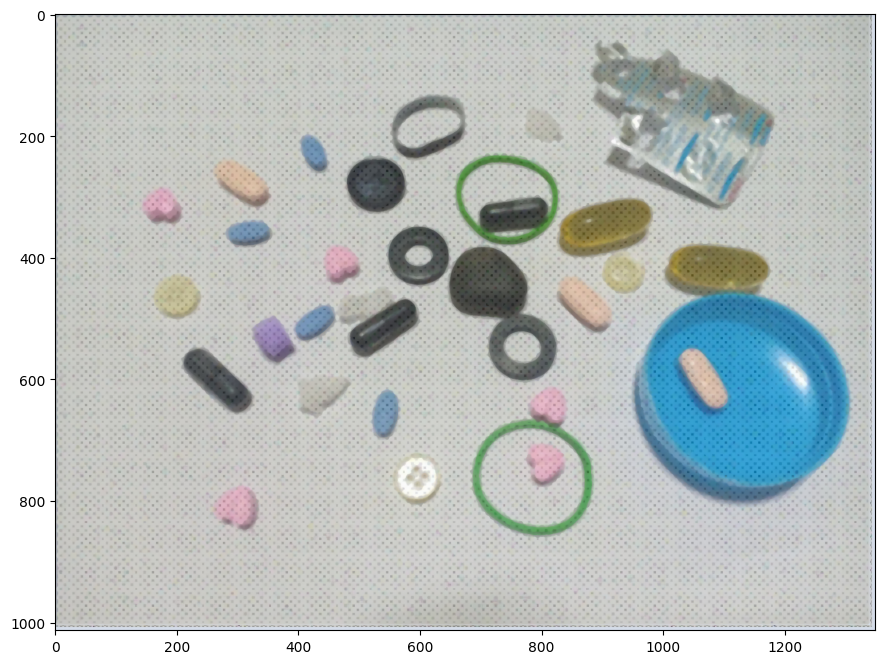

In [12]:
merge_img=cv.merge((median_r,median_g,median_b))

fig= plt.figure(figsize=(15,8))

bgr_img=cv.cvtColor(merge_img,cv.COLOR_RGB2BGR)

plt.imshow(bgr_img)

In [13]:
# img = cv.imread('mediBlue_Finish.jpg')
# fig=plt.figure(figsize=(20,10))

# mask = np.zeros(img.shape[:2],np.uint8)

# bgdModel = np.zeros((1,65),np.float64)
# fgdModel = np.zeros((1,65),np.float64)
# rect = (300,250,1001,1098) #x,y,w,h
 
# cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
# mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
# img = img*mask2[:,:,np.newaxis]
# plt.imshow(img),plt.colorbar(),plt.show()

In [14]:
# # newmask is the mask image I manually labelled
# newmask = cv.imread('newmask.png',0)
# newmask = cv.resize(newmask,(1348,1013),interpolation=cv.INTER_AREA)
# fig=plt.figure(figsize=(20,10))
# # wherever it is marked white (sure foreground), change mask=1
# # wherever it is marked black (sure background), change mask=0
# mask[newmask == 0] = 0
# mask[newmask == 255] = 1
# mask, bgdModel, fgdModel = cv.grabCut(img,mask,None,bgdModel,fgdModel,5,cv.GC_INIT_WITH_MASK)
# mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
# img_output = img*mask[:,:,np.newaxis].astype('uint8')
# plt.imshow(img_output),plt.colorbar(),plt.show()